## Visium Same Modality

### Packages

In [1]:
import squidpy as sq
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import mudata as md

In [2]:
from liana.method.sp._misty import misty
from liana.method.sp._misty import plot_distance_weights, plot_importance, plot_contribution, plot_performance

### Load data

In [3]:
img = sq.datasets.visium_hne_image()
adata = sq.datasets.visium_hne_adata()
sq.gr.spatial_neighbors(adata)
adata

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap', 'spatial_neighbors'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

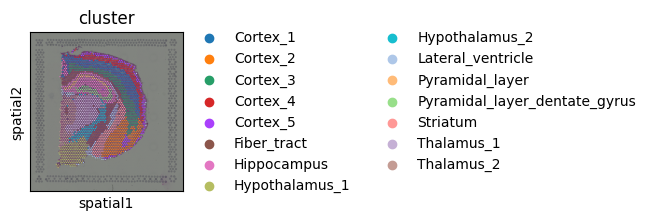

In [4]:
sq.pl.spatial_scatter(adata, color="cluster")

### Subset Features: Spatially Variable Genes

In [5]:
#genes = adata[:, adata.var.highly_variable].var_names.values[:200]
#sq.gr.spatial_autocorr(
#    adata,
#    mode="moran",
#    genes=genes,
#    n_perms=100,
#    n_jobs=-1,
#)
#features = adata.uns["moranI"][adata.uns["moranI"].I > 0.4].index
features = ["Dbi", "3110035E14Rik", "Resp18", "Lypd1", "1500015O10Rik", "Ngef", "Ecel1", "Kcnj13", "Csrp1", "2010300C02Rik", "Atp2b4", "Ptpn4", "Bok", "Scg2", "Rgs16", "Ogfrl1", "Itm2c", "Tuba4a", "C1ql2", "Satb2", "Ptprn", "Fzd5", "Pantr1", "Tmbim1", "Lct"]

In [6]:
len(features)

25

In [7]:
mdata = md.MuData(data={"rna": adata})

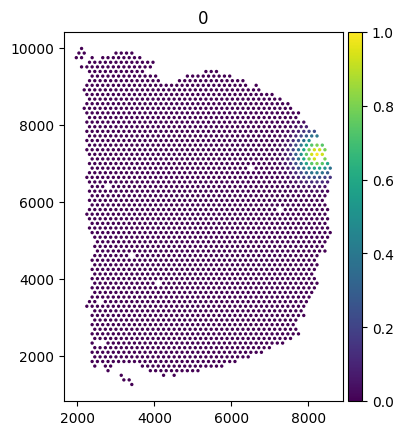

In [8]:
plot_distance_weights(mdata["rna"], cells=[0], bandwidth=500, add_self=True, spatial_key="spatial", s=2)

In [9]:
misty(mdata=mdata, x_mod="rna", bandwidth=500, targets=features, predictors=features, inplace=True)

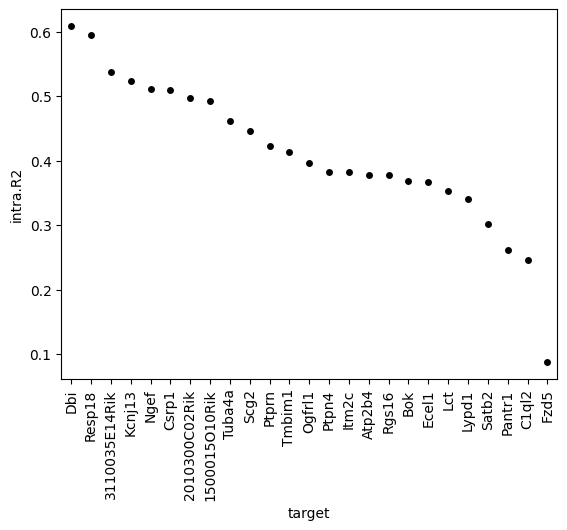

In [10]:
plot_performance(mdata.uns["misty_results"]["performances"], stat="intra.R2")

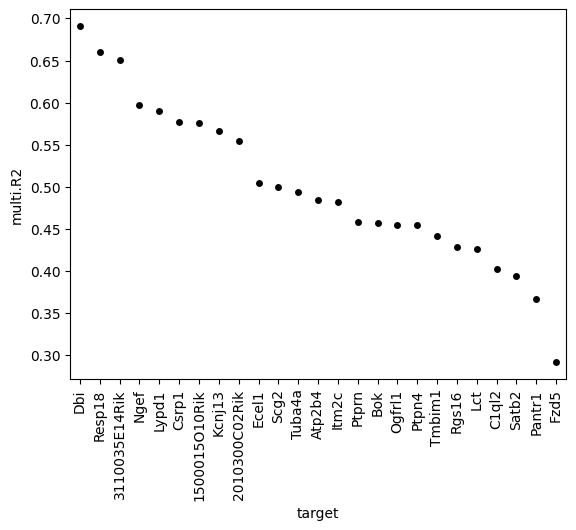

In [11]:
plot_performance(mdata.uns["misty_results"]["performances"], stat="multi.R2")

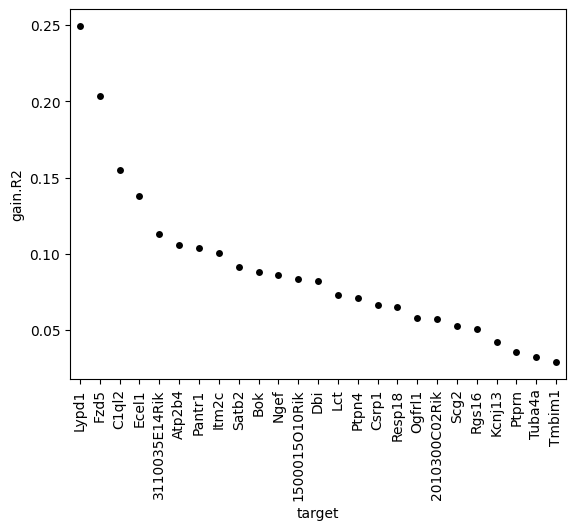

In [12]:
plot_performance(mdata.uns["misty_results"]["performances"], stat="gain.R2")

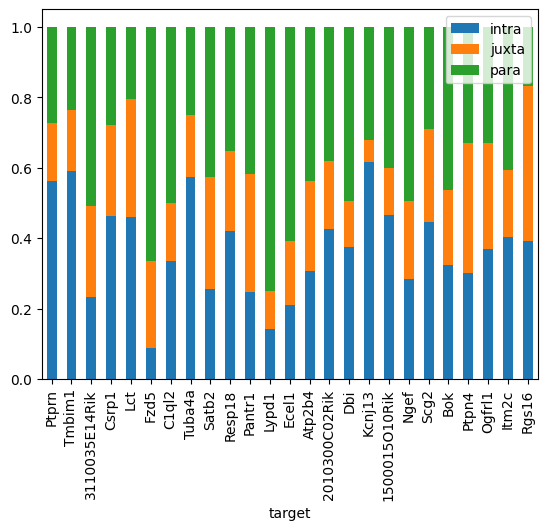

In [13]:
plot_contribution(mdata.uns["misty_results"]["contributions"])

In [14]:
plot_importance(mdata.uns["misty_results"]["importances"], view="intra")

predictor,1500015O10Rik,2010300C02Rik,3110035E14Rik,Atp2b4,Bok,C1ql2,Csrp1,Dbi,Ecel1,Fzd5,Itm2c,Kcnj13,Lct,Lypd1,Ngef,Ogfrl1,Pantr1,Ptpn4,Ptprn,Resp18,Rgs16,Satb2,Scg2,Tmbim1,Tuba4a
target,,,,,,,,,,,,,,,,,,,,,,,,,
1500015O10Rik,nan,0.018369,0.013510,0.014734,0.021448,0.007081,0.020358,0.081191,0.007904,0.003305,0.044602,0.535617,0.006314,0.022491,0.018251,0.026899,0.024771,0.014464,0.026663,0.018095,0.004832,0.009441,0.015956,0.014993,0.028713
2010300C02Rik,0.008527,nan,0.068244,0.034902,0.023028,0.015023,0.058679,0.150336,0.007832,0.003894,0.050789,0.003317,0.054987,0.046632,0.163576,0.027811,0.049091,0.045556,0.037669,0.038967,0.012341,0.009414,0.029756,0.023449,0.036180
3110035E14Rik,0.007885,0.093519,nan,0.027242,0.020104,0.006008,0.028339,0.112764,0.010078,0.002589,0.044463,0.001716,0.002142,0.033800,0.087520,0.036103,0.046564,0.026169,0.030642,0.042005,0.008607,0.203316,0.032566,0.016462,0.079399
Atp2b4,0.008972,0.039506,0.035322,nan,0.030418,0.009429,0.048554,0.043666,0.010827,0.004565,0.115964,0.001579,0.015425,0.079633,0.216931,0.037734,0.050107,0.028392,0.049734,0.049412,0.012472,0.013488,0.033565,0.023459,0.040846
Bok,0.006864,0.034555,0.039453,0.031536,nan,0.008470,0.048070,0.039673,0.011092,0.006022,0.041911,0.001979,0.004162,0.031187,0.061605,0.275407,0.046162,0.065304,0.036490,0.045259,0.034795,0.016562,0.036738,0.024096,0.052608
C1ql2,0.012532,0.153895,0.038523,0.020486,0.029089,nan,0.041411,0.055325,0.016611,0.010532,0.040341,0.002358,0.132649,0.039617,0.028539,0.026641,0.095272,0.033629,0.045712,0.054159,0.016491,0.008105,0.036208,0.022470,0.039406
Csrp1,0.006617,0.046121,0.021236,0.024598,0.023287,0.005578,nan,0.110602,0.004691,0.004945,0.044449,0.003308,0.002663,0.033258,0.024415,0.031218,0.028283,0.019362,0.065292,0.038552,0.010313,0.008654,0.026075,0.371781,0.044701
Dbi,0.028580,0.050760,0.058910,0.018203,0.017130,0.004625,0.083236,nan,0.006391,0.002452,0.047228,0.003852,0.001096,0.020630,0.052447,0.055772,0.020868,0.017449,0.026544,0.088203,0.006734,0.041200,0.020828,0.030615,0.296249
Ecel1,0.008854,0.020517,0.016909,0.030522,0.022282,0.011650,0.036077,0.047247,nan,0.003694,0.057242,0.002702,0.001216,0.037836,0.024091,0.031546,0.028206,0.032248,0.032325,0.411124,0.009022,0.003455,0.067881,0.029616,0.033738


In [15]:
plot_importance(mdata.uns["misty_results"]["importances"], view="juxta")

predictor,1500015O10Rik,2010300C02Rik,3110035E14Rik,Atp2b4,Bok,C1ql2,Csrp1,Dbi,Ecel1,Fzd5,Itm2c,Kcnj13,Lct,Lypd1,Ngef,Ogfrl1,Pantr1,Ptpn4,Ptprn,Resp18,Rgs16,Satb2,Scg2,Tmbim1,Tuba4a
target,,,,,,,,,,,,,,,,,,,,,,,,,
1500015O10Rik,nan,0.019411,0.018743,0.020357,0.021116,0.007376,0.021242,0.042923,0.014481,0.009156,0.026913,0.542839,0.009703,0.036258,0.022426,0.018130,0.030703,0.022153,0.016902,0.018208,0.014644,0.009762,0.017063,0.020874,0.018618
2010300C02Rik,0.011978,nan,0.285305,0.034892,0.028362,0.019154,0.094863,0.050284,0.009300,0.007304,0.042128,0.004118,0.056866,0.047848,0.052995,0.028623,0.036994,0.021908,0.021450,0.030294,0.016284,0.018133,0.025605,0.024684,0.030627
3110035E14Rik,0.010380,0.114456,nan,0.024201,0.024289,0.010013,0.020829,0.032708,0.010644,0.007669,0.029852,0.004343,0.006584,0.021303,0.035057,0.038978,0.032515,0.016421,0.020017,0.022272,0.015901,0.380364,0.025827,0.019753,0.075621
Atp2b4,0.015547,0.028585,0.027946,nan,0.034604,0.017616,0.047779,0.041086,0.015871,0.012675,0.079384,0.005129,0.018302,0.059047,0.302536,0.031636,0.041522,0.028448,0.026566,0.039543,0.018018,0.019838,0.028218,0.033375,0.026730
Bok,0.015964,0.028365,0.045757,0.032086,nan,0.016889,0.033890,0.031587,0.014652,0.010089,0.029922,0.006098,0.007390,0.032979,0.051798,0.363856,0.029525,0.036293,0.030859,0.032254,0.025379,0.031759,0.029060,0.028181,0.035368
C1ql2,0.013668,0.036525,0.044458,0.033673,0.028618,nan,0.031417,0.049511,0.014694,0.016510,0.030465,0.003057,0.287584,0.053861,0.031026,0.032056,0.059213,0.022755,0.027036,0.054107,0.017127,0.015442,0.043599,0.025206,0.028393
Csrp1,0.016535,0.084770,0.020446,0.031603,0.022267,0.016130,nan,0.030159,0.010908,0.008054,0.024399,0.006153,0.007292,0.027443,0.023945,0.022669,0.027421,0.025841,0.059693,0.026747,0.016194,0.014079,0.029192,0.406666,0.041391
Dbi,0.020286,0.082473,0.026614,0.018068,0.025021,0.009287,0.064005,nan,0.010098,0.006664,0.035912,0.004731,0.003691,0.019832,0.046643,0.048238,0.015583,0.018175,0.019284,0.060419,0.010075,0.262127,0.019316,0.026288,0.147171
Ecel1,0.025284,0.022210,0.026430,0.023402,0.046277,0.023470,0.039400,0.027552,nan,0.010328,0.033101,0.008557,0.001824,0.031605,0.020313,0.043832,0.029466,0.050535,0.020952,0.369030,0.022080,0.007479,0.049682,0.033402,0.033787


In [16]:
plot_importance(mdata.uns["misty_results"]["importances"], view="para")

predictor,1500015O10Rik,2010300C02Rik,3110035E14Rik,Atp2b4,Bok,C1ql2,Csrp1,Dbi,Ecel1,Fzd5,Itm2c,Kcnj13,Lct,Lypd1,Ngef,Ogfrl1,Pantr1,Ptpn4,Ptprn,Resp18,Rgs16,Satb2,Scg2,Tmbim1,Tuba4a
target,,,,,,,,,,,,,,,,,,,,,,,,,
1500015O10Rik,nan,0.018334,0.019832,0.022434,0.021598,0.026180,0.018357,0.025103,0.024585,0.019842,0.017707,0.493594,0.022898,0.045906,0.018066,0.015671,0.017877,0.027021,0.015785,0.023625,0.029444,0.018451,0.021979,0.016242,0.019471
2010300C02Rik,0.021200,nan,0.357046,0.034706,0.018990,0.038758,0.062452,0.021789,0.025113,0.027749,0.018864,0.021720,0.026131,0.020786,0.022562,0.029068,0.031456,0.020897,0.017914,0.027108,0.029439,0.021567,0.043007,0.038060,0.023619
3110035E14Rik,0.017409,0.068786,nan,0.015725,0.015728,0.021479,0.014465,0.043336,0.016841,0.023690,0.011344,0.016701,0.015039,0.015817,0.014766,0.014602,0.034031,0.014391,0.015787,0.020408,0.017106,0.444345,0.016272,0.014265,0.097666
Atp2b4,0.026346,0.027656,0.040346,nan,0.020501,0.022077,0.053841,0.026767,0.040196,0.028032,0.028635,0.026537,0.033668,0.054903,0.277958,0.022377,0.043489,0.028354,0.021799,0.026083,0.025636,0.027048,0.023135,0.053997,0.020618
Bok,0.033982,0.019297,0.026127,0.046216,nan,0.026270,0.022945,0.020560,0.027336,0.040010,0.019647,0.035579,0.030145,0.024551,0.022897,0.360813,0.025392,0.040956,0.022556,0.026584,0.034944,0.026621,0.023618,0.023504,0.019450
C1ql2,0.026353,0.023352,0.048406,0.028486,0.032616,nan,0.032895,0.025672,0.038830,0.030561,0.020199,0.037306,0.323800,0.034422,0.032721,0.018797,0.027957,0.028022,0.019585,0.046522,0.030302,0.031659,0.021619,0.024310,0.015607
Csrp1,0.027930,0.033023,0.030189,0.052084,0.019240,0.025437,nan,0.018256,0.017236,0.030671,0.019551,0.027276,0.021249,0.028251,0.022110,0.018590,0.029092,0.019061,0.040437,0.021078,0.025899,0.027343,0.024319,0.399197,0.022481
Dbi,0.057807,0.044446,0.074056,0.019899,0.030402,0.021613,0.058298,nan,0.067045,0.019217,0.014606,0.015663,0.018903,0.014569,0.017123,0.036376,0.020302,0.015630,0.018360,0.019682,0.026482,0.275427,0.021360,0.038393,0.054342
Ecel1,0.028510,0.019153,0.021883,0.019740,0.022502,0.029782,0.033628,0.024846,nan,0.022550,0.019921,0.018497,0.096101,0.019976,0.014646,0.029229,0.037134,0.086304,0.029714,0.266156,0.022384,0.032925,0.023254,0.066011,0.015154


In [ ]:
misty(mdata=mdata, x_mod="rna", bandwidth=500, targets=features, predictors=features, inplace=True, overwrite=True, keep_same_predictor=True)

In [ ]:
plot_importance(mdata.uns["misty_results"]["importances"], view="intra")

In [ ]:
plot_importance(mdata.uns["misty_results"]["importances"], view="para")